# Netflix stock price prediction

               - Thulasi Gabbita(NU01134)

### Importing required modules

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Loading the Dataset

In [2]:
df = pd.read_csv('NFLX.csv')

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


### Exploring the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [5]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


### Data Cleaning, Analysis, and EDA

In [7]:
df['Formated Date']=pd.to_datetime(df['Date'])

In [8]:
df.set_index('Date',inplace=True)

In [9]:
df

,Open,High,Low,Close,Adj Close,Volume,Formated Date
Date,,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,2018-02-05
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,2018-02-06
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,2018-02-07
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,2018-02-08
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,2018-02-09
...,...,...,...,...,...,...,...
2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500,2022-01-31
2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300,2022-02-01
2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000,2022-02-02


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1009 entries, 2018-02-05 to 2022-02-04
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Open           1009 non-null   float64       
 1   High           1009 non-null   float64       
 2   Low            1009 non-null   float64       
 3   Close          1009 non-null   float64       
 4   Adj Close      1009 non-null   float64       
 5   Volume         1009 non-null   int64         
 6   Formated Date  1009 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 63.1+ KB


#### Plotting all price values 

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

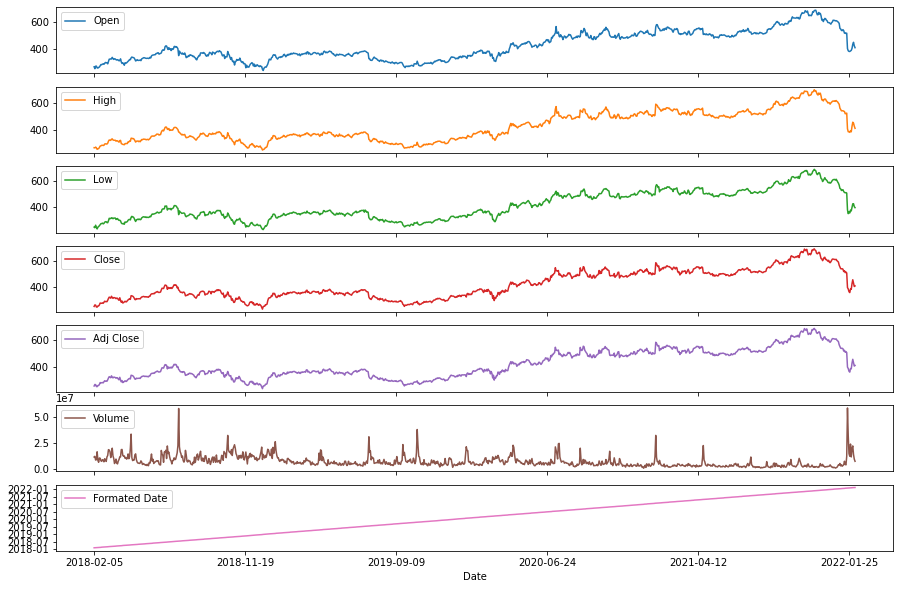

In [11]:
df.plot(subplots=True, figsize=(15,10))

#### Distribution of "Close" price 

<AxesSubplot:title={'center':'Distribution of "Close" price'}, xlabel='Close', ylabel='Count'>

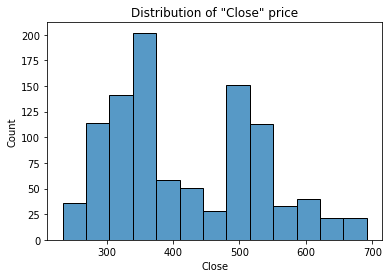

In [12]:
plt.title('Distribution of "Close" price')
sns.histplot(df['Close'])

#### Variation in "Close" price over 5 years

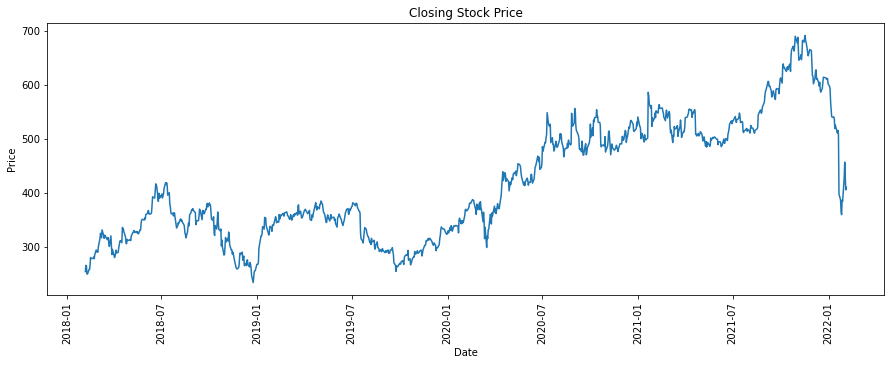

In [13]:
plt.figure(figsize=(15,5))
plt.title('Closing Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.plot(df['Formated Date'], df.Close)
plt.show()

#### Calculating Daily returns 

In [14]:
df['Daily Returns'] = df['Adj Close'].pct_change()
df

,Open,High,Low,Close,Adj Close,Volume,Formated Date,Daily Returns
Date,,,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,2018-02-05,NaN
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,2018-02-06,0.045072
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,2018-02-07,-0.004366
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,2018-02-08,-0.054657
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,2018-02-09,-0.002519
...,...,...,...,...,...,...,...,...
2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500,2022-01-31,0.111302
2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300,2022-02-01,0.070211
2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000,2022-02-02,-0.060486


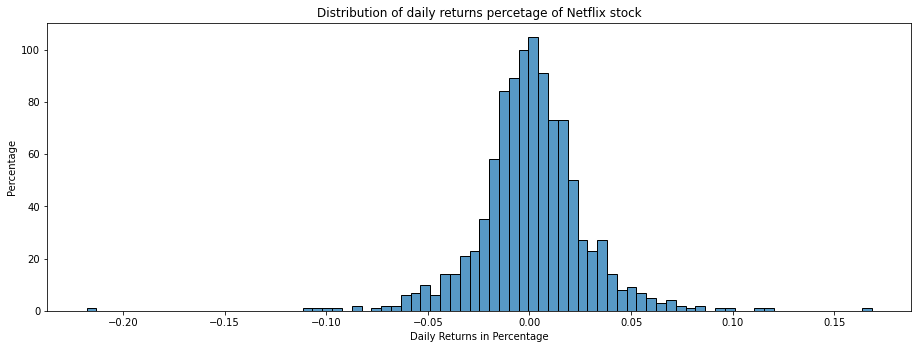

In [15]:
fig=plt.figure(figsize=(15,5))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
sns.histplot(data=df['Daily Returns'],bins=80)
ax1.set_xlabel('Daily Returns in Percentage')
ax1.set_ylabel('Percentage')
ax1.set_title("Distribution of daily returns percetage of Netflix stock")
plt.show()

Text(0.5, 1.0, 'Daily returns for the Netflix stock between 02/05/18 to 02/04/22')

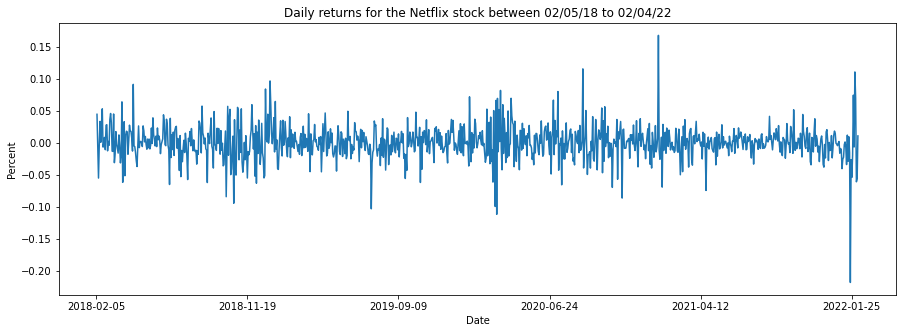

In [16]:
plt.figure(figsize=(15,5))
df['Daily Returns'].plot()
plt.xlabel('Date')
plt.ylabel('Percent')
plt.title('Daily returns for the Netflix stock between 02/05/18 to 02/04/22')

#### Calculating cumulative returns over 5 years

In [17]:
df['Cumulative Returns'] =  (df['Daily Returns']+1).cumprod()
df

,Open,High,Low,Close,Adj Close,Volume,Formated Date,Daily Returns,Cumulative Returns
Date,,,,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,2018-02-05,NaN,NaN
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,2018-02-06,0.045072,1.045072
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,2018-02-07,-0.004366,1.040510
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,2018-02-08,-0.054657,0.983639
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,2018-02-09,-0.002519,0.981161
...,...,...,...,...,...,...,...,...,...
2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500,2022-01-31,0.111302,1.679934
2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300,2022-02-01,0.070211,1.797884
2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000,2022-02-02,-0.060486,1.689137


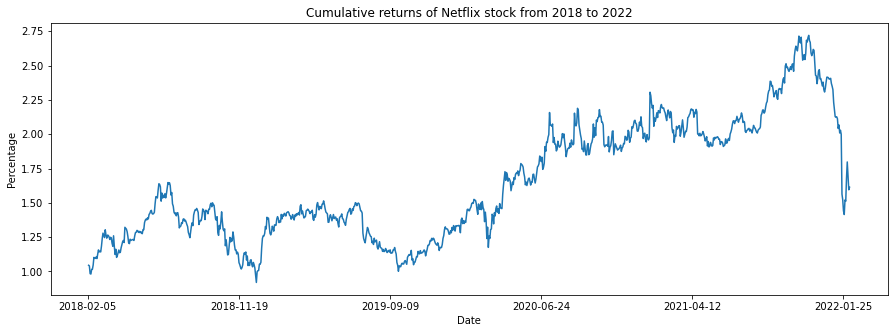

In [18]:
plt.figure(figsize=(15,5))
df['Cumulative Returns'].plot()
plt.xlabel("Date")
plt.ylabel("Percentage")
plt.title('Cumulative returns of Netflix stock from 2018 to 2022')
plt.show()


#### Plot comparision of Closing price and moving average

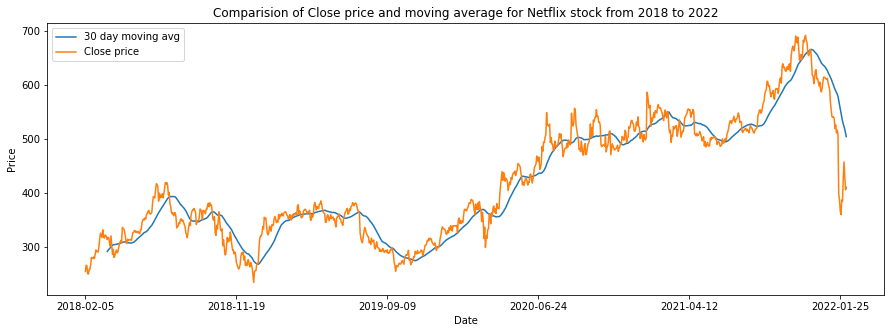

In [19]:
plt.figure(figsize=(15,5))
df['Close'].rolling(window=30).mean().plot(label='30 day moving avg')
df['Close'].plot(label='Close price')
plt.title('Comparision of Close price and moving average for Netflix stock from 2018 to 2022')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

### Train and Test split

In [20]:
X = df[['Open','High','Low','Volume']]
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
print(f'Training samples: {X_train.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

Training samples: 807
Test samples: 202


In [21]:
#Feature Scaling
scaler = StandardScaler().fit_transform(X_train)

### Linear Regression

In [22]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f'Linear Regression model Mean Squared Error : {mse_lr}')
print(f'R2 Score : {r2_score(y_test, y_pred_lr)}')

Linear Regression model Mean Squared Error : 14.3056703720512
R2 Score : 0.9988434142941172


### Random Forest model

In [23]:
rf_model = RandomForestRegressor(n_estimators=300, random_state = 100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Random Forest Regression model Mean Squared Error : {mse_rf}')
print(f'R2 Score : {r2_score(y_test, y_pred_rf)}')

Random Forest Regression model Mean Squared Error : 26.180351955094498
R2 Score : 0.9978833693172882


### ARIMA model
#### Testing for stationarity using ADFuller test

In [24]:

!pip install pmdarima


In [25]:
df1 = df.groupby('Date')['Adj Close'].sum().reset_index()
df1.Date=pd.to_datetime(df1.Date)
df1.set_index(['Date'],inplace=True)
df1

,Adj Close
Date,
2018-02-05,254.259995
2018-02-06,265.720001
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001
...,...
2022-01-31,427.140015
2022-02-01,457.130005
2022-02-02,429.480011


In [26]:



def adfuller_test(trends):
    result = adfuller(trends)
    labels = ['ADF Test Statistic','p-value','#Lags Used','#Observation Used']
    for value,label in zip(result,labels):
        print(label  + ': ' + str(value))
    if result[1]<=0.05:
        print('Strong evidence against the null hypothesis, Hence REJECT null hypothesis Ho indicating that the series is Stationary')
    else:
        print('week evidence against null hypothesis, time series has a unit root. So, accept H0 and the series is not stationary.')
        
adfuller_test(df1['Adj Close'])

ADF Test Statistic: -1.8125906878289952
p-value: 0.37422892568207605
#Lags Used: 6
#Observation Used: 1002
week evidence against null hypothesis, time series has a unit root. So, accept H0 and the series is not stationary.


#### Differencing

ADF Test Statistic: -14.242275992929105
p-value: 1.530402275429928e-26
#Lags Used: 5
#Observation Used: 1002
Strong evidence against the null hypothesis, Hence REJECT null hypothesis Ho indicating that the series is Stationary


<AxesSubplot:xlabel='Date'>

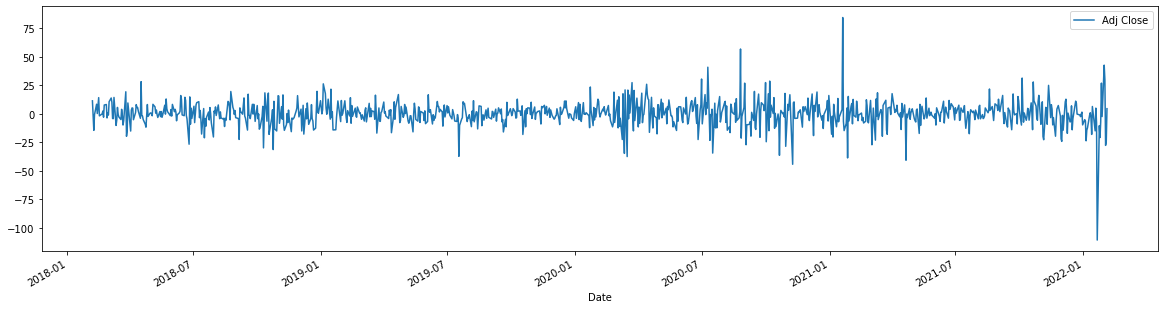

In [27]:
diff1=df1-df1.shift(1)
diff1=diff1.dropna()
adfuller_test(diff1)
diff1.plot(figsize=(20,5))


#### Implementing Arima model 

In [28]:
model=ARIMA(df['Adj Close'],order=(6,1,6))
result=model.fit()
result.summary()

C:\Users\THULASI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\THULASI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\THULASI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\THULASI\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                 1009
Model:                 ARIMA(6, 1, 6)   Log Likelihood               -3838.365
Date:                Sun, 17 Dec 2023   AIC                           7702.730
Time:                        16:55:18   BIC                           7766.635
Sample:                             0   HQIC                          7727.009
                               - 1009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2231      0.065      3.448      0.001       0.096       0.350
ar.L2          0.6266      0.062     10.110      0.000       0.505       0.748
ar.L3         -1.1330      0.069    -16.532      0.000      -1.267      -0.999
ar.L4          0.5400      0.062      8.682      0.000       0.418       0.662
ar.L5          0.2458      0.057      4.345      0.000       0.135       0.357
ar.L6         -0.8751      0.065    -13.516      0.000      -1.002      -0.748
ma.L1         -0.2630      0.074     -3.539      0.000      -0.409      -0.117
ma.L2         -0.5882      0.068     -8.653      0.000      -0.721      -0.455
ma.L3          1.1598      0.071     16.440      0.000       1.021       1.298
ma.L4         -0.5776      0.065     -8.892      0.000      -0.705      -0.450
ma.L5         -0.2656      0.066     -4.054      0.000      -0.394      -0.137
ma.L6          0.8401      0.073     11.508      0.000       0.697       0.983
sigma2       120.4770      2.387     50.465      0.000     115.798     125.156
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):              9327.09
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               2.16   Skew:                            -0.71
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
import joblib

joblib.dump(model, 'DATA606_Netflix_ARIMA.pkl')


['DATA606_Netflix_ARIMA.pkl']

<AxesSubplot:xlabel='Date'>

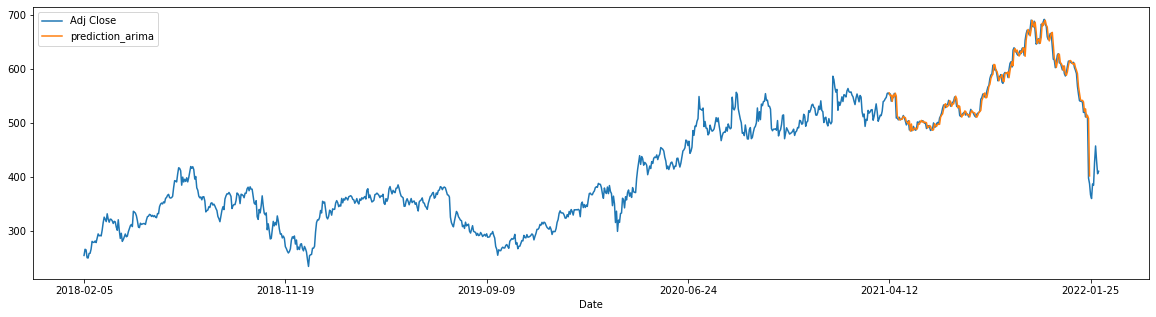

In [30]:
df['prediction_arima']=result.predict(start=800,end=999)
df[["Adj Close","prediction_arima"]].plot(figsize=(20,5))

In [31]:
#finding mean square error
mse = mean_squared_error(df['Close'][800:998],df['prediction_arima'][800:998])
mse

88.83683999651628

In [32]:
#finding r2 score
r2_score(df['Close'][800:998],df['prediction_arima'][800:998])

0.9751900630142214

#### forecasting values for next 30 days

In [33]:
forecast = result.forecast(30, alpha=0.05)
forecast

C:\Users\THULASI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


1009    408.631870
1010    400.253788
1011    393.267672
1012    391.865092
1013    396.125961
1014    398.260226
1015    398.509742
1016    399.932606
1017    406.058198
1018    411.461371
1019    411.824102
1020    407.312668
1021    403.850761
1022    403.018495
1023    401.938123
1024    398.022324
1025    394.118623
1026    394.665438
1027    399.019381
1028    403.104676
1029    404.000053
1030    404.589465
1031    406.555285
1032    409.146627
1033    407.966424
1034    404.062890
1035    399.939185
1036    399.276739
1037    399.246797
1038    398.831303
Name: predicted_mean, dtype: float64

In [34]:
start_date = '2022-02-05'
end_date = '2022-03-06'
date_range = pd.date_range(start=start_date, end=end_date)

In [35]:
df_future = pd.DataFrame({'Date': date_range,'PredictedValues': forecast})
df_future

,Date,PredictedValues
1009,2022-02-05,408.631870
1010,2022-02-06,400.253788
1011,2022-02-07,393.267672
1012,2022-02-08,391.865092
1013,2022-02-09,396.125961
1014,2022-02-10,398.260226
1015,2022-02-11,398.509742
1016,2022-02-12,399.932606
1017,2022-02-13,406.058198
1018,2022-02-14,411.461371


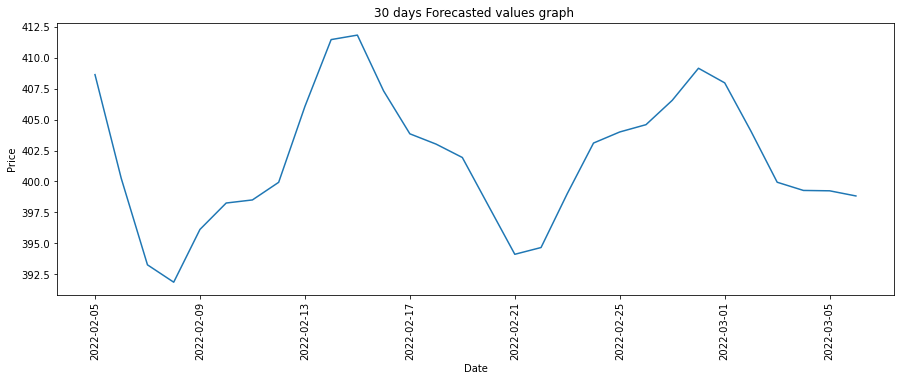

In [36]:
# Graph for forecasted values
plt.figure(figsize=(15,5))
plt.title('30 days Forecasted values graph ')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.plot(df_future['Date'], df_future['PredictedValues'])
plt.show()

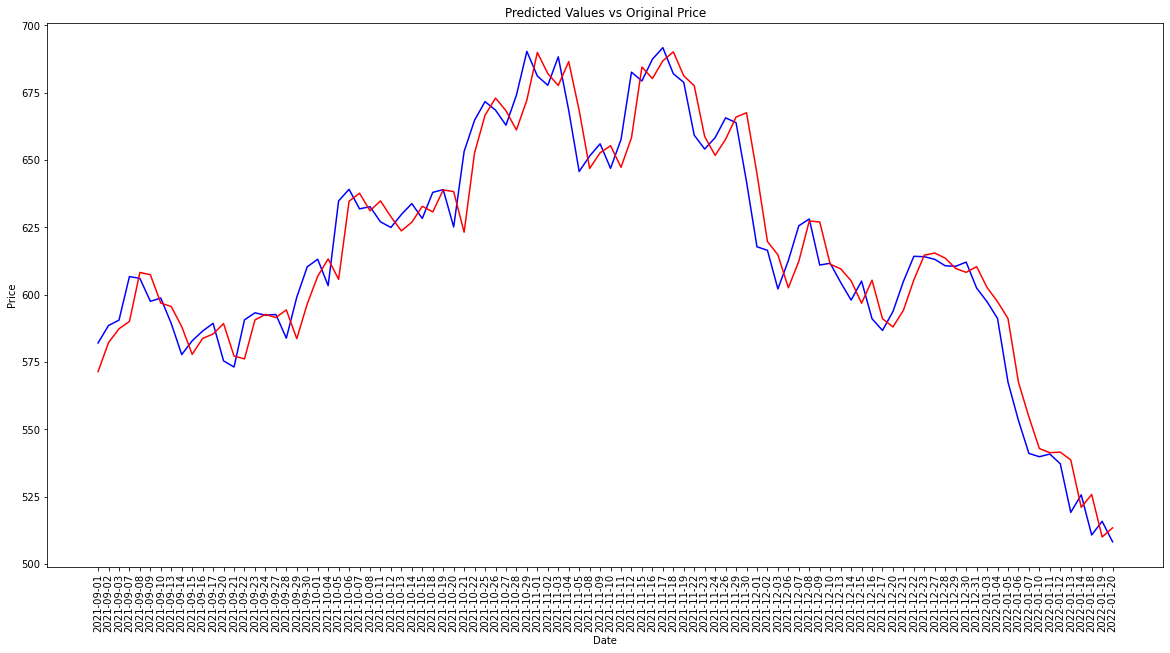

In [37]:
plt.figure(figsize=(20,10))
plt.plot(df['Close'][900:998], 'b', label = 'Original Price')
plt.plot(df['prediction_arima'][900:998], 'r', label = 'Predicted Price')
plt.xlabel('Date')
plt.title('Predicted Values vs Original Price')
plt.xticks(rotation=90)
plt.ylabel('Price')
plt.show()